In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_transaction = pd.read_csv('Case Study - Transaction.csv', delimiter = ';')
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [3]:
df_customer = pd.read_csv('Case Study - Customer.csv',delimiter = ';')
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [4]:
df_product = pd.read_csv('Case Study - Product.csv',delimiter = ';')
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [5]:
df_store = pd.read_csv('Case Study - Store.csv',delimiter = ';')
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


### Data Cleansing

In [6]:
#Customer
df_customer['Income'] = df_customer['Income'].replace('[,]','.',regex=True).astype('float')
df_customer

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57
...,...,...,...,...,...
442,443,33,1,NaN,9.28
443,444,53,0,Married,15.31
444,445,51,0,Married,14.48
445,446,57,0,Married,7.81


In [7]:
# Store
df_store['Latitude'] = df_store['Latitude'].replace('[,]','.',regex=True).astype('float')
df_store['Longitude'] = df_store['Longitude'].replace('[,]','.',regex=True).astype('float')
df_store

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845
5,6,Lingga,Lingga,Modern Trade,-5.135399,119.423790
6,7,Buana Indah,Buana,General Trade,3.316694,114.590111
7,8,Sinar Harapan,Harapan Baru,General Trade,5.548290,95.323753
8,9,Lingga,Lingga,Modern Trade,-3.654703,128.190643
9,10,Harapan Baru,Harapan Baru,General Trade,3.597031,98.678513


In [8]:
# transaction
df_transaction['Date']= pd.to_datetime(df_transaction['Date'])
df_transaction

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4
...,...,...,...,...,...,...,...,...
5015,TR54423,243,2022-12-31,P10,15000,5,75000,3
5016,TR5604,271,2022-12-31,P2,3200,4,12800,9
5017,TR81224,52,2022-12-31,P7,9400,6,56400,9
5018,TR85016,18,2022-12-31,P8,16000,3,48000,13


### Merger Data

In [9]:
df_merge = pd.merge(df_transaction,df_customer, on = ['CustomerID'])
df_merge = pd.merge(df_merge,df_product.drop(columns=['Price']),on=['ProductID'])
df_merge = pd.merge(df_merge,df_store,on=['StoreID'])
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


### Machine Learning Regression (Time Series)

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from kneed import DataGenerator, KneeLocator
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

import warnings
warnings.filterwarnings('ignore')

In [11]:
df_regresion = df_merge.groupby('Date').agg({'Qty':'sum'}).reset_index()
df_regresion

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


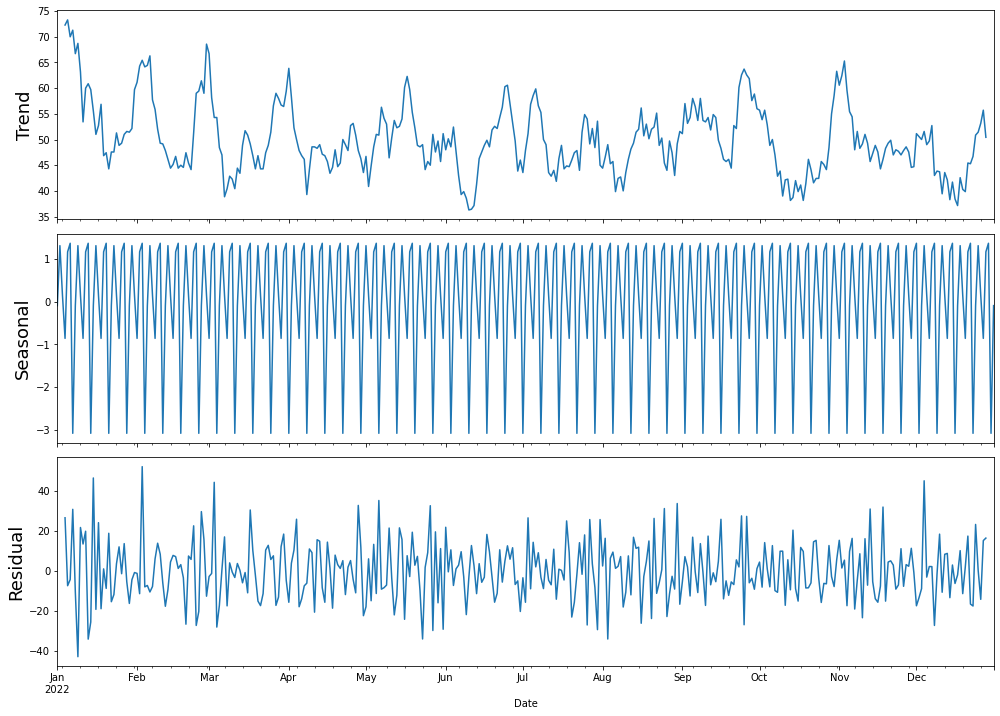

In [12]:
data_index = df_regresion.set_index('Date')
regresion_decomposition = seasonal_decompose(data_index)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

regresion_decomposition.trend.plot(ax=ax1)
ax1.set_ylabel('Trend', fontsize=18)
regresion_decomposition.seasonal.plot(ax=ax2)
ax2.set_ylabel('Seasonal', fontsize=18)
regresion_decomposition.resid.plot(ax=ax3)
ax3.set_ylabel('Residual', fontsize=18)

plt.tight_layout()
plt.show()

### Uji Stasioneritas

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_regresion['Qty'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

print("% significant : 0.05")
print("Conclusion :")
if result[1] <= 0.05:
  print("The data is stationary (",result[1],"<= 0.05, reject H0)")
else:
  print("The data is non-stationary (",result[1],"> 0.05, fail to reject H0)")

ADF Statistic: -19.018783
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
% significant : 0.05
Conclusion :
The data is stationary ( 0.0 <= 0.05, reject H0)


#### Karena stasioner, maka kemungkinan besar model ARIMA(p,0,q)

#### Nilai p dan q

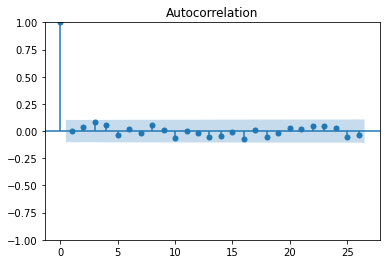

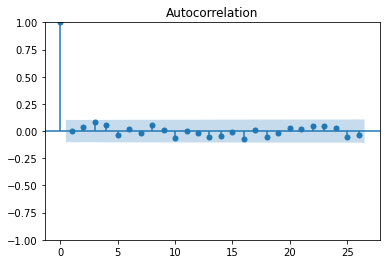

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

plot_acf(df_regresion.Qty.dropna())

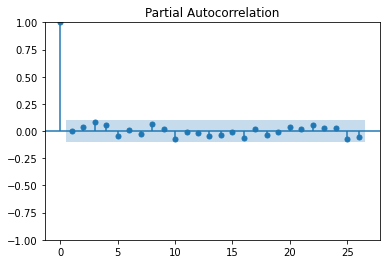

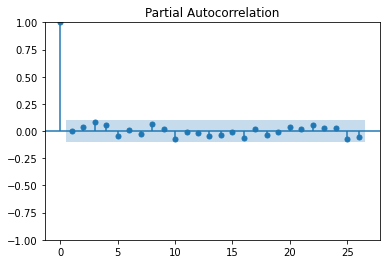

In [15]:
sm.graphics.tsa.plot_pacf(df_regresion.Qty.dropna())

##### dari PACF dan ACF disimpulkan bahwa model adalah ARIMA(0,0,0)

##### dari PACF juga tidak terdapat pola tertentu yang berarti tidak ada tanda2 seasonal

In [16]:
# split 80% data training dan 20% data testing
cut_off = round(df_regresion.shape[0] * 0.8) 
df_train = df_regresion[:cut_off]
df_test = df_regresion[cut_off:].reset_index(drop=True)
df_train.shape, df_test.shape

((292, 2), (73, 2))

In [17]:
df_train

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
287,2022-10-15,33
288,2022-10-16,26
289,2022-10-17,53
290,2022-10-18,47


In [18]:
df_test

,Date,Qty
0,2022-10-20,39
1,2022-10-21,35
2,2022-10-22,56
3,2022-10-23,59
4,2022-10-24,39
...,...,...
68,2022-12-27,70
69,2022-12-28,68
70,2022-12-29,42
71,2022-12-30,44


<AxesSubplot:xlabel='Date', ylabel='Qty'>

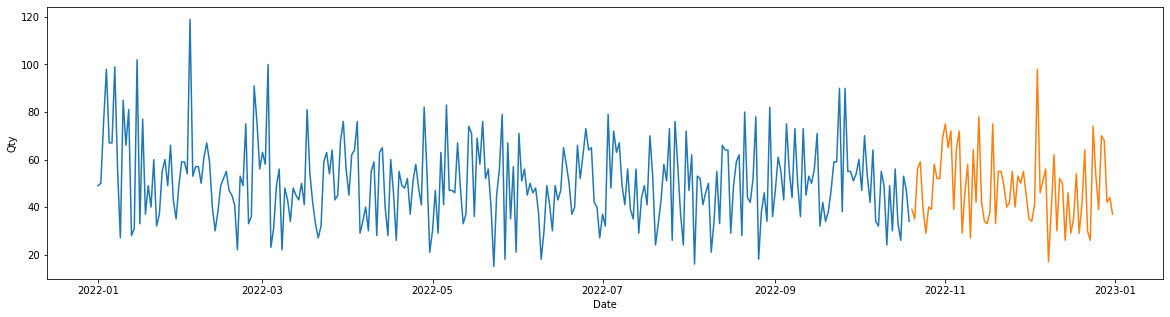

In [19]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_train, x=df_train['Date'], y=df_train['Qty'])
sns.lineplot(data=df_test, x=df_test['Date'], y=df_test['Qty'])

In [20]:
#RMSE dan MAE
def rmse (y_actual, y_pred):
  print(f'RMSE Value{mean_squared_error(y_actual, y_pred, squared=False)** 0.5}')

def eval(y_actual, y_pred):
  rmse(y_actual, y_pred)
  print(f'MAE Value{mean_absolute_error(y_actual, y_pred)** 0.5}')

RMSE Value3.93779951178295
MAE Value3.580711500857178


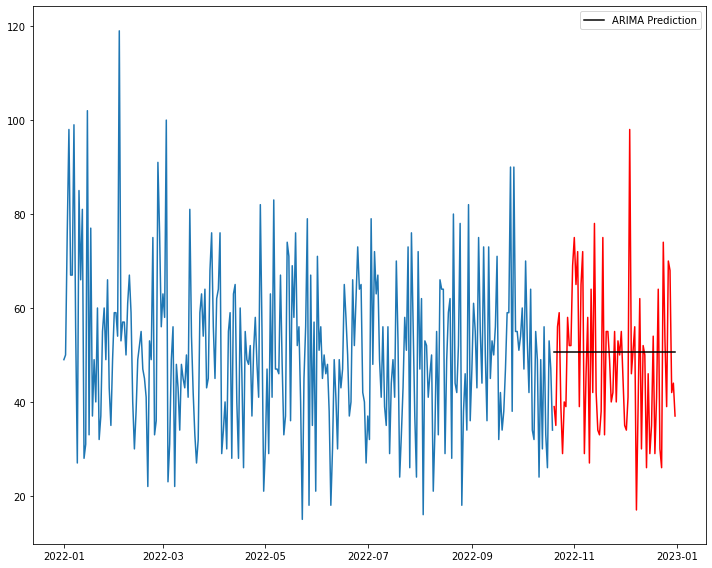

In [21]:
#ARIMA
df_train = df_train.set_index('Date')
df_test = df_test.set_index('Date')
y = df_train['Qty']

model_ARIMA = ARIMA(y, order=(0,0,0)) #order = (p,d,q)
model_ARIMA = model_ARIMA.fit()

y_pred = model_ARIMA.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['prediction'] = model_ARIMA.predict(start = y_pred_df.index[0],end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['prediction']

eval(df_test['Qty'],y_pred_out)

plt.figure(figsize=(10,8))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'],color = 'red')
plt.plot(y_pred_out, color = 'black', label = 'ARIMA Prediction')
plt.legend()
plt.tight_layout()

In [22]:
# Melakukan Forecast dari data yang digunakan selama satu bulan = 31 hari
forecast_result = model_ARIMA.get_forecast(31)
forecast_result = forecast_result.conf_int()
forecast_result['forecasted Qty'] = model_ARIMA.predict(start = forecast_result.index[0], end = forecast_result.index[-1])
forecast_result['Date'] = pd.date_range(start ='2023-01-01', end = '2023-01-31')
forecast_result.set_index('Date', inplace = True)
forecast_result.head()

,lower Qty,upper Qty,forecasted Qty
Date,,,
2023-01-01,17.368915,83.898199,50.633557
2023-01-02,17.368915,83.898199,50.633557
2023-01-03,17.368915,83.898199,50.633557
2023-01-04,17.368915,83.898199,50.633557
2023-01-05,17.368915,83.898199,50.633557


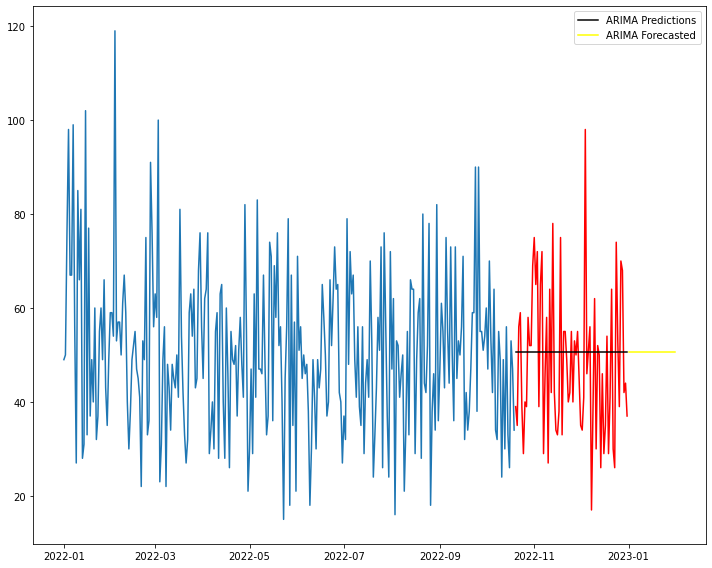

In [23]:
plt.figure(figsize = (10,8))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color = 'red')
plt.plot(y_pred_out, color = 'black', label = 'ARIMA Predictions')
plt.plot(forecast_result['forecasted Qty'], color = 'yellow', label = 'ARIMA Forecasted')
plt.legend()
plt.tight_layout()

### Clustering

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
df_merge

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR69555,221,2022-01-08,P4,12000,3,36000,4,23,1,Single,7.50,Potato Chip,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5016,TR21587,425,2022-10-17,P4,12000,1,12000,4,58,1,Married,7.22,Potato Chip,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5017,TR51183,409,2022-07-19,P4,12000,1,12000,4,47,0,Married,28.23,Potato Chip,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5018,TR14963,374,2022-12-16,P4,12000,5,60000,4,32,0,Single,5.40,Potato Chip,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [26]:
df_merge.corr()

,CustomerID,Price,Qty,TotalAmount,StoreID,Age,Gender,Income,Latitude,Longitude
CustomerID,1.000000,-0.016423,-0.009755,-0.024915,0.004129,-0.025952,-0.009947,0.005783,0.002278,-0.003122
Price,-0.016423,1.000000,-0.353640,0.440632,-0.032863,0.014693,0.010705,0.001196,-0.029008,0.018652
Qty,-0.009755,-0.353640,1.000000,0.621129,0.014365,-0.027768,-0.010542,-0.028425,-0.004170,0.004807
TotalAmount,-0.024915,0.440632,0.621129,1.000000,-0.010722,-0.016900,-0.008774,-0.025350,-0.029938,0.025437
StoreID,0.004129,-0.032863,0.014365,-0.010722,1.000000,-0.003872,-0.000189,0.001613,0.471852,-0.094943
Age,-0.025952,0.014693,-0.027768,-0.016900,-0.003872,1.000000,-0.033183,0.486692,0.009266,0.015951
Gender,-0.009947,0.010705,-0.010542,-0.008774,-0.000189,-0.033183,1.000000,-0.071443,-0.006051,-0.001183
Income,0.005783,0.001196,-0.028425,-0.025350,0.001613,0.486692,-0.071443,1.000000,0.015518,0.004385
Latitude,0.002278,-0.029008,-0.004170,-0.029938,0.471852,0.009266,-0.006051,0.015518,1.000000,-0.395995
Longitude,-0.003122,0.018652,0.004807,0.025437,-0.094943,0.015951,-0.001183,0.004385,-0.395995,1.000000


In [27]:
df_cluster = df_merge.groupby('CustomerID').agg({'TransactionID':'count', 'Qty':'sum','TotalAmount':'sum'}).reset_index()
df_cluster

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


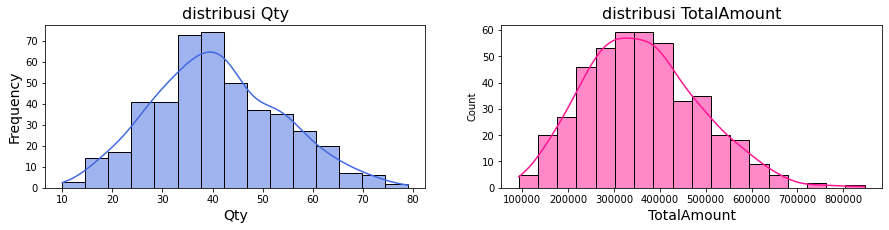

In [28]:
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.histplot(df_cluster['Qty'],color='royalblue',kde=True)
plt.title('distribusi Qty', fontsize=16)
plt.xlabel('Qty', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.subplot(1,2,2)
sns.histplot(df_cluster['TotalAmount'],color='deeppink', kde=True)
plt.title('distribusi TotalAmount', fontsize=16)
plt.xlabel('TotalAmount', fontsize=14)

plt.show()

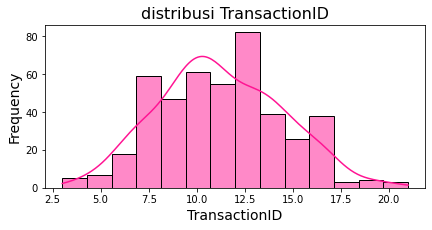

In [29]:
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.histplot(df_cluster['TransactionID'],color='deeppink', kde=True)
plt.title('distribusi TransactionID', fontsize=16)
plt.xlabel('TransactionID', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

In [30]:
data_cluster = df_cluster.drop(columns=['CustomerID'])
data_cluster_normal = MinMaxScaler().fit_transform(data_cluster)
data_cluster_normal

array([[0.77777778, 0.72463768, 0.70394911],
       [0.55555556, 0.68115942, 0.39782666],
       [0.66666667, 0.66666667, 0.46925523],
       ...,
       [0.83333333, 0.84057971, 0.6561092 ],
       [0.44444444, 0.46376812, 0.43890803],
       [0.55555556, 0.46376812, 0.46011132]])

In [31]:
df_cluster_normal = pd.DataFrame(data = data_cluster_normal, columns=data_cluster.columns)
df_cluster_normal

,TransactionID,Qty,TotalAmount
0,0.777778,0.724638,0.703949
1,0.555556,0.681159,0.397827
2,0.666667,0.666667,0.469255
3,0.388889,0.521739,0.278823
4,0.222222,0.246377,0.233899
...,...,...,...
442,0.722222,0.710145,0.520806
443,0.833333,0.753623,0.643520
444,0.833333,0.840580,0.656109
445,0.444444,0.463768,0.438908


#### Menentukan jumlah K

In [32]:
WCSS=[]
n = range(2 , 11)
for i in n:
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_cluster_normal)
    WCSS.append(kmeans.inertia_)
print(WCSS)

[16.968194891001403, 9.872461459685413, 7.44658548555488, 5.958481281642763, 5.294217664960856, 4.810111810753916, 4.366735224440491, 4.035704854786339, 3.7979226446302725]


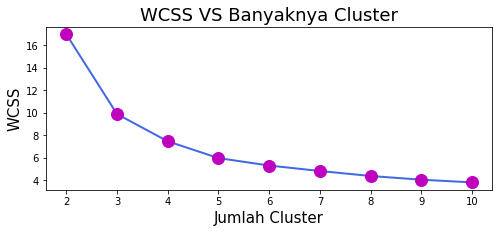

In [33]:
plt.figure(figsize=(8,3))
plt.plot(list(n), WCSS, color='royalblue', marker='o',linewidth=2,markersize=12,markerfacecolor='m', markeredgecolor='m')
plt.title('WCSS VS Banyaknya Cluster', fontsize=18)
plt.xlabel('Jumlah Cluster', fontsize=15)
plt.ylabel('WCSS', fontsize=15)
plt.show()

#### sudah tidak terjadi perubahan yang signifikan ketika pada k=3, karena hanya selisih 2 dari k=4

In [34]:
# Clustering dengan k = 3
kmeans = KMeans(n_clusters=3, random_state=0)
df_cluster['Cluster']= kmeans.fit_predict(df_cluster)
df_kmeans = df_cluster
df_kmeans

,CustomerID,TransactionID,Qty,TotalAmount,Cluster
0,1,17,60,623300,0
1,2,13,57,392300,1
2,3,15,56,446200,1
3,4,10,46,302500,2
4,5,7,27,268600,2
...,...,...,...,...,...
442,443,16,59,485100,0
443,444,18,62,577700,0
444,445,18,68,587200,0
445,446,11,42,423300,1


In [35]:
#rata-rata per cluster
mean_cluster = df_kmeans.groupby(('Cluster')).agg({
    'CustomerID':'count',
    'TransactionID':'mean',
    'Qty':'mean',
    'TotalAmount':'mean'
})
mean_cluster

,CustomerID,TransactionID,Qty,TotalAmount
Cluster,,,,
0,90,15.322222,58.088889,548162.222222
1,186,11.752688,42.779570,384003.225806
2,171,8.508772,29.888889,241425.730994


In [36]:
#jumlah cluster
cluster_count = df_cluster['Cluster'].value_counts()
print('Jumlah cluster :')
print(cluster_count)

Jumlah cluster :
1    186
2    171
0     90
Name: Cluster, dtype: int64


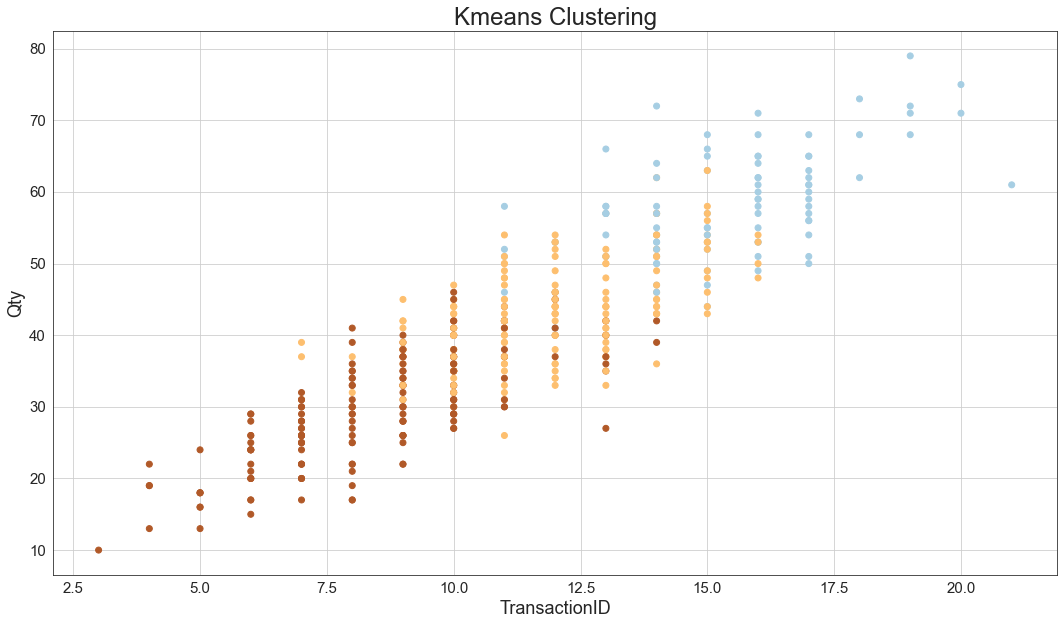

In [37]:
#Visualisasi
plt.figure(figsize=(18,10))
sns.set_style('white')
plt.scatter(x=df_kmeans['TransactionID'],y=df_kmeans['Qty'],c=df_kmeans['Cluster'],cmap='Paired')
plt.title('Kmeans Clustering', fontsize=24)
plt.xlabel('TransactionID', fontsize=18)
plt.ylabel('Qty', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

In [38]:
print(f'Silhouette Score(n=3):',{silhouette_score(df_cluster_normal, df_kmeans['Cluster'])})

Silhouette Score(n=3): {0.3163266168664607}


In [39]:
mean_cluster

,CustomerID,TransactionID,Qty,TotalAmount
Cluster,,,,
0,90,15.322222,58.088889,548162.222222
1,186,11.752688,42.779570,384003.225806
2,171,8.508772,29.888889,241425.730994


### Interpretasi Clustering

Interpretasi 3 kelompok cluster adalah berikut ini:

1. Cluster 0 - pada cluster 0 terdapat total Customer sebanyak 90 dengan rata-rata transaksi sebanyak 15 kali, sedangkan total kuantitas produk yang di beli yaitu rata-rata 58 produk dan rata-rata jumlah uang yang di belanjakan Customer adalah sekitar Rp548.162,- yang berarti total uang yang dibelanjakan 90 Customer adalah 49 juta atau Rp49.334.580,-

2. Cluster 1 - pada cluster 1 terdapat total Customer sebanyak 186 dengan rata-rata transaksi sebanyak 11 kali, sedangkan total kuantitas produk yang di beli yaitu rata-rata 42 produk dan rata-rata jumlah uang yang di belanjakan Customer adalah sekitar Rp384.003,- yang berarti total uang yang dibelanjakan 186 Customer adalah 71 juta atau Rp71.424.558,-

3. Cluster 2 - pada cluster 2 terdapat total Customer sebanyak 171 dengan rata-rata transaksi sebanyak 8 kali, sedangkan total kuantitas produk yang di beli yaitu rata-rata 29 produk dan rata-rata jumlah uang yang di belanjakan Customer adalah sekitar Rp241.425,- yang berarti total uang yang dibelanjakan 171 Customer adalah 41 juta atau Rp41.283.675,-

### Rekomendasi Bisnis

1. Cluster 2 - pada cluster 2 jumlah kuantitas produk yang paling sedikit dari cluster lainnya, meskipun jumlah Customer cukup banyak hal ini berarti terdapat kurangnya daya beli Customer cluster 2 sehingga perusahaan dapat memberikan diskon dan promo pada tingkat tertentu untuk menarik Customer membeli produk. Selain itu, perusahaan (Marketing) juga harus melakukan branding lagi untuk mendorong penjualan.

2. Cluster 1 - pada cluster 1 jumlah Customer dan total uang yang dibelanjakan paling banyak dari cluster lainnya. Maka prioritas utama perusahaan pada cluster 1 adalah mempertahankan Customer langganan untuk tetap setia pada perusahaan dan menjaga kepercayaan Customer dengan menjaga sumber, kualitas, dan keamanan produk. Selain itu, bagian marketing dapat menawarkan promo dan diskon melalui Email sehingga perusahaan dan customer dapat menjaga relasi.

3. Cluster 0 - pada cluster 0 jumlah rata-rata produk dan rata-rata uang yang dibelanjakan per Customer adalah yang terbanyak dari cluster lainnya, meskipun jumlah Customernya paling sedikit. Hal ini dapat berarti Customer memiliki daya beli yang tinggi. Daya beli yang tinggi diikuti dengan konsumsi yang tinggi. Oleh karena itu, perusahaan dapat memberikan kartu anggota bagi yang mencapai target belanja tertentu dan menawarkan produk exclusive bagi anggota.
